In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from tqdm import tqdm_notebook
import warnings
import multiprocessing
from scipy.optimize import minimize  
warnings.filterwarnings('ignore')

In [4]:
%%time
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
print(train.shape, test.shape)

(262144, 258) (131073, 257)
CPU times: user 22.8 s, sys: 1.75 s, total: 24.6 s
Wall time: 24.6 s


In [5]:
reg_params = [0.01,0.23,0.01,0.08,0.27,0.03,0.16,0.33,0.28,0.02,0.01,0.07,0.01,0.31
,0.28,0.26,0.02,0.1,0.11,0.17,0.42,0.34,0.11,0.22,0.61,0.12,0.14,0.19
,0.02,0.01,0.02,0.06,0.36,0.09,0.11,0.01,0.03,0.11,0.01,0.11,0.23,0.02
,0.17,0.14,0.12,0.06,0.08,0.01,0.26,0.01,0.02,0.04,0.33,0.03,0.07,0.16
,0.01,0.02,0.28,0.17,0.04,0.19,0.05,0.11,0.03,0.22,0.17,0.16,0.06,0.14
,0.01,0.07,0.05,0.06,0.2,0.05,0.02,0.09,0.05,0.01,0.08,0.1,0.01,0.22
,0.19,0.13,0.02,0.03,0.12,0.07,0.15,0.09,0.02,0.16,0.01,0.39,0.12,0.14
,0.09,0.41,0.32,0.13,0.15,0.01,0.41,0.12,0.01,0.13,0.17,0.03,0.08,0.12
,0.21,0.01,0.16,0.28,0.01,0.02,0.11,0.21,0.27,0.03,0.17,0.05,0.02,0.4
,0.28,0.01,0.03,0.28,0.02,0.12,0.17,0.1,0.01,0.1,0.01,0.24,0.11,0.18
,0.17,0.08,0.1,0.04,0.13,0.04,0.12,0.25,0.13,0.19,0.05,0.03,0.1,0.01
,0.05,0.01,0.01,0.01,0.18,0.24,0.13,0.01,0.15,0.01,0.09,0.04,0.06,0.01
,0.06,0.11,0.21,0.08,0.21,0.04,0.04,0.04,0.2,0.01,0.19,0.14,0.11,0.03
,0.23,0.01,0.04,0.13,0.46,0.04,0.07,0.08,0.07,0.01,0.11,0.2,0.07,0.23
,0.2,0.14,0.07,0.06,0.16,0.02,0.33,0.13,0.11,0.06,0.22,0.22,0.19,0.03
,0.1,0.37,0.22,0.01,0.01,0.22,0.07,0.01,0.23,0.35,0.03,0.29,0.01,0.04
,0.01,0.04,0.07,0.23,0.2,0.09,0.01,0.23,0.3,0.06,0.09,0.04,0.46,0.25
,0.14,0.01,0.04,0.03,0.01,0.04,0.11,0.08,0.01,0.09,0.05,0.1,0.05,0.28
,0.02,0.08,0.01,0.06,0.38,0.04,0.01,0.15,0.21,0.01,0.01,0.45,0.18,0.27
,0.24,0.01,0.04,0.14,0.13,0.18,0.22,0.32,0.13,0.07,0.26,0.17,0.12,0.14
,0.09,0.13,0.08,0.09,0.07,0.01,0.02,0.04,0.01,0.07,0.32,0.01,0.36,0.09
,0.11,0.06,0.46,0.11,0.16,0.21,0.01,0.1,0.01,0.1,0.23,0.05,0.33,0.01
,0.24,0.04,0.01,0.04,0.1,0.01,0.36,0.44,0.03,0.08,0.21,0.01,0.18,0.01
,0.17,0.19,0.03,0.01,0.18,0.15,0.48,0.06,0.17,0.18,0.37,0.01,0.31,0.01
,0.16,0.18,0.11,0.08,0.08,0.07,0.28,0.02,0.09,0.08,0.01,0.09,0.01,0.07
,0.01,0.24,0.09,0.02,0.37,0.16,0.04,0.14,0.22,0.06,0.29,0.16,0.06,0.06
,0.04,0.05,0.25,0.07,0.01,0.01,0.21,0.02,0.04,0.3,0.39,0.02,0.23,0.22
,0.05,0.01,0.06,0.05,0.02,0.01,0.02,0.12,0.11,0.05,0.01,0.2,0.01,0.08
,0.08,0.04,0.33,0.06,0.16,0.35,0.18,0.13,0.01,0.01,0.12,0.18,0.01,0.01
,0.17,0.08,0.48,0.18,0.01,0.02,0.35,0.15,0.34,0.01,0.14,0.01,0.32,0.34
,0.15,0.1,0.18,0.18,0.11,0.24,0.01,0.13,0.03,0.36,0.01,0.08,0.01,0.13
,0.07,0.08,0.24,0.01,0.05,0.05,0.1,0.07,0.21,0.01,0.08,0.11,0.09,0.04
,0.01,0.11,0.02,0.09,0.16,0.51,0.17,0.09,0.03,0.12,0.06,0.18,0.01,0.01
,0.02,0.02,0.01,0.27,0.28,0.09,0.02,0.13,0.03,0.16,0.15,0.04,0.17,0.19
,0.26,0.01,0.04,0.1,0.04,0.01,0.07,0.05,0.02,0.59,0.01,0.2,0.12,0.1
,0.07,0.18,0.08,0.01,0.34,0.15,0.28,0.12,0.05,0.01,0.11,0.08,0.12,0.04
,0.05,0.33,0.01,0.01,0.09,0.07,0.19,0.09]

In [6]:
oof = np.zeros(len(train))
preds = np.zeros(len(test))
#reg_params = np.zeros(512)
for i in tqdm_notebook(range(512)):

    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)

    data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
    pipe = Pipeline([('vt', VarianceThreshold(threshold=1.5)), ('scaler', StandardScaler())])
    data2 = pipe.fit_transform(data[cols])
    train3 = data2[:train2.shape[0]]; test3 = data2[train2.shape[0]:]

    skf = StratifiedKFold(n_splits=30, random_state=42)
    for train_index, test_index in skf.split(train2, train2['target']):

        clf = QuadraticDiscriminantAnalysis(reg_params[i])
#         qda = QuadraticDiscriminantAnalysis()
#         clf = GridSearchCV(qda, params, cv=4)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
#         reg_params[i] = clf.best_params_['reg_param']
        oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits

auc = roc_auc_score(train['target'], oof)
print(f'AUC: {auc:.5}')
# print('best_params:', reg_params)


AUC: 0.96585


In [7]:
for i in range(5):
    test['target'] = preds
    test.loc[test['target'] > 0.94, 'target'] = 1
    test.loc[test['target'] < 0.06, 'target'] = 0
    usefull_test = test[(test['target'] == 1) | (test['target'] == 0)]
    new_train = pd.concat([train, usefull_test]).reset_index(drop=True)
    print(usefull_test.shape[0])
    new_train.loc[oof > 0.98, 'target'] = 1
    new_train.loc[oof < 0.02, 'target'] = 0
    oof2 = np.zeros(len(train))
    preds = np.zeros(len(test))
    for i in tqdm_notebook(range(512)):
        train2 = new_train[new_train['wheezy-copper-turtle-magic']==i]
        test2 = test[test['wheezy-copper-turtle-magic']==i]
        idx1 = train[train['wheezy-copper-turtle-magic']==i].index
        idx2 = test2.index
        train2.reset_index(drop=True,inplace=True)

        data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
        pipe = Pipeline([('vt', VarianceThreshold(threshold=1.5)), ('scaler', StandardScaler())])
        data2 = pipe.fit_transform(data[cols])
        train3 = data2[:train2.shape[0]]
        test3 = data2[train2.shape[0]:]
        skf = StratifiedKFold(n_splits=30, random_state=42)
        for train_index, test_index in skf.split(train2, train2['target']):
            oof_test_index = [t for t in test_index if t < len(idx1)]
            clf = QuadraticDiscriminantAnalysis(reg_params[i])
            clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
            if len(oof_test_index) > 0:
                oof2[idx1[oof_test_index]] = clf.predict_proba(train3[oof_test_index,:])[:,1]
            preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
    auc = roc_auc_score(train['target'], oof2)
    print(f'AUC: {auc:.5}')

116667



AUC: 0.97193
122129



AUC: 0.97123
122520



AUC: 0.97117
122570



AUC: 0.97116
122580



AUC: 0.97116


In [8]:
subtc = pd.read_csv('../input/sample_submission.csv')
subtc['target'] = preds
#sub.to_csv('submission.csv',index=False)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook
import warnings
import multiprocessing
from scipy.optimize import minimize  
import time
warnings.filterwarnings('ignore')
# STEP 2
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
print(train.shape, test.shape)
# STEP 3
oof = np.zeros(len(train))
preds = np.zeros(len(test))

for i in tqdm_notebook(range(512)):

    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)

    data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
    pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
    data2 = pipe.fit_transform(data[cols])
    train3 = data2[:train2.shape[0]]; test3 = data2[train2.shape[0]:]

    skf = StratifiedKFold(n_splits=11, random_state=42)
    for train_index, test_index in skf.split(train2, train2['target']):

        clf = QuadraticDiscriminantAnalysis(0.5)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits

auc = roc_auc_score(train['target'], oof)
print(f'AUC: {auc:.5}')

# STEP 4
for itr in range(4):
    test['target'] = preds
    test.loc[test['target'] > 0.955, 'target'] = 1 # initial 94
    test.loc[test['target'] < 0.045, 'target'] = 0 # initial 06
    usefull_test = test[(test['target'] == 1) | (test['target'] == 0)]
    new_train = pd.concat([train, usefull_test]).reset_index(drop=True)
    print(usefull_test.shape[0], "Test Records added for iteration : ", itr)
    new_train.loc[oof > 0.995, 'target'] = 1 # initial 98
    new_train.loc[oof < 0.005, 'target'] = 0 # initial 02
    oof2 = np.zeros(len(train))
    preds = np.zeros(len(test))
    for i in tqdm_notebook(range(512)):

        train2 = new_train[new_train['wheezy-copper-turtle-magic']==i]
        test2 = test[test['wheezy-copper-turtle-magic']==i]
        idx1 = train[train['wheezy-copper-turtle-magic']==i].index
        idx2 = test2.index
        train2.reset_index(drop=True,inplace=True)

        data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
        pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
        data2 = pipe.fit_transform(data[cols])
        train3 = data2[:train2.shape[0]]
        test3 = data2[train2.shape[0]:]

        skf = StratifiedKFold(n_splits=11, random_state=time.time)
        for train_index, test_index in skf.split(train2, train2['target']):
            oof_test_index = [t for t in test_index if t < len(idx1)]
            
            clf = QuadraticDiscriminantAnalysis(0.5)
            clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
            if len(oof_test_index) > 0:
                oof2[idx1[oof_test_index]] = clf.predict_proba(train3[oof_test_index,:])[:,1]
            preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
    auc = roc_auc_score(train['target'], oof2)
    print(f'AUC: {auc:.5}')
    
# STEP 5
sub1 = pd.read_csv('../input/sample_submission.csv')
sub1['target'] = preds
# sub.to_csv('submission.csv',index=False)

(262144, 258) (131073, 257)



AUC: 0.9649
112714 Test Records added for iteration :  0



AUC: 0.97154
119378 Test Records added for iteration :  1



AUC: 0.97074
119788 Test Records added for iteration :  2



AUC: 0.97068
119865 Test Records added for iteration :  3



AUC: 0.97068


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook
import warnings
import multiprocessing
from scipy.optimize import minimize  
warnings.filterwarnings('ignore')

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
print(train.shape, test.shape)


oof = np.zeros(len(train))
preds = np.zeros(len(test))

for i in tqdm_notebook(range(512)):

    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)

    data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
    pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
    data2 = pipe.fit_transform(data[cols])
    train3 = data2[:train2.shape[0]]; test3 = data2[train2.shape[0]:]

    skf = StratifiedKFold(n_splits=11, random_state=42)
    for train_index, test_index in skf.split(train2, train2['target']):

        clf = QuadraticDiscriminantAnalysis(0.5)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits

auc = roc_auc_score(train['target'], oof)
print(f'AUC: {auc:.5}')

for itr in range(4):
    test['target'] = preds
    test.loc[test['target'] > 0.94, 'target'] = 1
    test.loc[test['target'] < 0.06, 'target'] = 0
    usefull_test = test[(test['target'] == 1) | (test['target'] == 0)]
    new_train = pd.concat([train, usefull_test]).reset_index(drop=True)
    print(usefull_test.shape[0], "Test Records added for iteration : ", itr)
    new_train.loc[oof > 0.98, 'target'] = 1
    new_train.loc[oof < 0.02, 'target'] = 0
    oof2 = np.zeros(len(train))
    preds = np.zeros(len(test))
    for i in tqdm_notebook(range(512)):

        train2 = new_train[new_train['wheezy-copper-turtle-magic']==i]
        test2 = test[test['wheezy-copper-turtle-magic']==i]
        idx1 = train[train['wheezy-copper-turtle-magic']==i].index
        idx2 = test2.index
        train2.reset_index(drop=True,inplace=True)

        data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
        pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
        data2 = pipe.fit_transform(data[cols])
        train3 = data2[:train2.shape[0]]
        test3 = data2[train2.shape[0]:]

        skf = StratifiedKFold(n_splits=11, random_state=42)
        for train_index, test_index in skf.split(train2, train2['target']):
            oof_test_index = [t for t in test_index if t < len(idx1)]
            
            clf = QuadraticDiscriminantAnalysis(0.5)
            clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
            if len(oof_test_index) > 0:
                oof2[idx1[oof_test_index]] = clf.predict_proba(train3[oof_test_index,:])[:,1]
            preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
    auc = roc_auc_score(train['target'], oof2)
    print(f'AUC: {auc:.5}')

sub2 = pd.read_csv('../input/sample_submission.csv')
sub2['target'] = preds
# sub.to_csv('submission.csv',index=False)

(262144, 258) (131073, 257)



AUC: 0.9649
114545 Test Records added for iteration :  0



AUC: 0.97178
120834 Test Records added for iteration :  1



AUC: 0.97094
121313 Test Records added for iteration :  2



AUC: 0.97087
121394 Test Records added for iteration :  3



AUC: 0.97086


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook
import warnings
import multiprocessing
from scipy.optimize import minimize  
import time
from sklearn.model_selection import GridSearchCV, train_test_split

warnings.filterwarnings('ignore')
# STEP 2
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
print(train.shape, test.shape)
# STEP 3
oof = np.zeros(len(train))
preds = np.zeros(len(test))
params = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]

# 512 models
reg_params = np.zeros(512)
for i in tqdm_notebook(range(512)):

    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)

    data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
    pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
    data2 = pipe.fit_transform(data[cols])
    train3 = data2[:train2.shape[0]]; test3 = data2[train2.shape[0]:]

    skf = StratifiedKFold(n_splits=11, random_state=42)
    for train_index, test_index in skf.split(train2, train2['target']):

        qda = QuadraticDiscriminantAnalysis()
        clf = GridSearchCV(qda, params, cv=4)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        reg_params[i] = clf.best_params_['reg_param']
        oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits

auc = roc_auc_score(train['target'], oof)
print(f'AUC: {auc:.5}')

# STEP 4
for itr in range(10):
    test['target'] = preds
    test.loc[test['target'] > 0.955, 'target'] = 1 # initial 94
    test.loc[test['target'] < 0.045, 'target'] = 0 # initial 06
    usefull_test = test[(test['target'] == 1) | (test['target'] == 0)]
    new_train = pd.concat([train, usefull_test]).reset_index(drop=True)
    print(usefull_test.shape[0], "Test Records added for iteration : ", itr)
    new_train.loc[oof > 0.995, 'target'] = 1 # initial 98
    new_train.loc[oof < 0.005, 'target'] = 0 # initial 02
    oof2 = np.zeros(len(train))
    preds = np.zeros(len(test))
    for i in tqdm_notebook(range(512)):

        train2 = new_train[new_train['wheezy-copper-turtle-magic']==i]
        test2 = test[test['wheezy-copper-turtle-magic']==i]
        idx1 = train[train['wheezy-copper-turtle-magic']==i].index
        idx2 = test2.index
        train2.reset_index(drop=True,inplace=True)

        data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
        pipe = Pipeline([('vt', VarianceThreshold(threshold=2)), ('scaler', StandardScaler())])
        data2 = pipe.fit_transform(data[cols])
        train3 = data2[:train2.shape[0]]
        test3 = data2[train2.shape[0]:]

        skf = StratifiedKFold(n_splits=11, random_state=time.time)
        for train_index, test_index in skf.split(train2, train2['target']):
            oof_test_index = [t for t in test_index if t < len(idx1)]
            
            clf = QuadraticDiscriminantAnalysis(reg_params[i])
            clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
            if len(oof_test_index) > 0:
                oof2[idx1[oof_test_index]] = clf.predict_proba(train3[oof_test_index,:])[:,1]
            preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
    auc = roc_auc_score(train['target'], oof2)
    print(f'AUC: {auc:.5}')
    
# STEP 5
sub3 = pd.read_csv('../input/sample_submission.csv')
sub3['target'] = preds
# sub.to_csv('submission.csv',index=False)

(262144, 258) (131073, 257)



AUC: 0.96462
102002 Test Records added for iteration :  0



AUC: 0.97112
117709 Test Records added for iteration :  1



AUC: 0.97045
118766 Test Records added for iteration :  2



AUC: 0.97043
118916 Test Records added for iteration :  3



AUC: 0.97042
118943 Test Records added for iteration :  4



AUC: 0.97043
118947 Test Records added for iteration :  5



AUC: 0.97043
118947 Test Records added for iteration :  6



AUC: 0.97043
118947 Test Records added for iteration :  7



AUC: 0.97043
118947 Test Records added for iteration :  8



AUC: 0.97043
118947 Test Records added for iteration :  9



AUC: 0.97043


In [12]:
sub = pd.read_csv('../input/sample_submission.csv')
sub.head()

,id,target
0,1c13f2701648e0b0d46d8a2a5a131a53,0.5
1,ba88c155ba898fc8b5099893036ef205,0.5
2,7cbab5cea99169139e7e6d8ff74ebb77,0.5
3,ca820ad57809f62eb7b4d13f5d4371a0,0.5
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.5


In [13]:
sub['target'] = 1/3*sub1.target + 1/3*sub2.target + 1/3*sub3.target

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm_notebook
import warnings
import multiprocessing
from scipy.optimize import minimize  
warnings.filterwarnings('ignore')

In [15]:
train1 = pd.read_csv('../input/train.csv')
test1 = pd.read_csv('../input/test.csv')
cols1 = [c for c in train1.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

In [16]:
def instant_model(train, test, cols = cols1, clf = QuadraticDiscriminantAnalysis(0.5), selection = "PCA"):
    oof = np.zeros(len(train))
    preds = np.zeros(len(test))

    for i in tqdm_notebook(range(512)):

        train2 = train[train['wheezy-copper-turtle-magic'] == i]
        test2 = test[test['wheezy-copper-turtle-magic'] == i]
        idx1 = train2.index
        idx2 = test2.index

        data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
        
        if selection == "variance":
            # StandardScaler & Variance selection
            data2 = StandardScaler().fit_transform(VarianceThreshold(threshold=2).fit_transform(data[cols]))
            train3 = pd.DataFrame(data2[:train2.shape[0]], index = idx1)
            test3 = pd.DataFrame(data2[train2.shape[0]:], index = idx2)
            
        elif selection == "PCA":
            # PCA
            pca = PCA(n_components = 40, random_state= 1234)
            pca.fit(data[:train2.shape[0]])
            train3 = pd.DataFrame(pca.transform(data[:train2.shape[0]]), index = idx1)
            test3 = pd.DataFrame(pca.transform(data[train2.shape[0]:]), index = idx2)
        
        train3['target'] = train2['target']

        # Kfold
        skf = StratifiedKFold(n_splits=11, random_state=42)
        for train_index, test_index in skf.split(train3, train3['target']):
            # clf
            clf = clf
            X_train = train3.iloc[train_index, :].drop(["target"], axis = 1)
            X_test = train3.iloc[test_index, :].drop(["target"], axis = 1)
            y_train = train3.iloc[train_index, :]['target']
            y_test = train3.iloc[test_index, :]['target']
            clf.fit(X_train, y_train)

            # output
            train_prob = clf.predict_proba(X_train)[:,1]
            test_prob = clf.predict_proba(X_test)[:,1]
            oof[idx1[test_index]] = test_prob

            # bagging
            preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
            # print("Chunk {0} Fold {1}".format(i, roc_auc_score(y_test, test_prob)))

    auc = roc_auc_score(train['target'], oof)
    print(f'AUC: {auc:.5}')
    
    return oof, preds

In [17]:
def get_newtrain(train, test, preds, oof):
    # get useful train set from train and test data
    # get useful test 
    test['target'] = preds
    test.loc[test['target'] > 0.985, 'target'] = 1
    test.loc[test['target'] < 0.015, 'target'] = 0
    usefull_test = test[(test['target'] == 1) | (test['target'] == 0)]

    # get useful train 
    new_train = pd.concat([train, usefull_test]).reset_index(drop=True)
    new_train.loc[oof > 0.985, 'target'] = 1
    new_train.loc[oof < 0.015, 'target'] = 0
    return new_train

In [18]:
oof_temp, preds_temp = instant_model(train1, test1, selection = 'variance')
newtrain1 = get_newtrain(train1, test1, preds_temp, oof_temp)


AUC: 0.9649


In [19]:
oof_qda_var, preds_qda_var = instant_model(newtrain1, test1, selection = 'variance')
# oof_nusvm, preds_nusvm = instant_model(newtrain1, test1, clf = NuSVC(probability = True, kernel = 'poly'))
oof_knn_var, preds_knn_var = instant_model(newtrain1, test1, \
                                   clf = KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance'),\
                                   selection = 'variance')


AUC: 0.99787



AUC: 0.97541


In [20]:
oof_qda_pca, preds_qda_pca = instant_model(newtrain1, test1)
# oof_nusvm, preds_nusvm = instant_model(newtrain1, test1, clf = NuSVC(probability = True, kernel = 'poly'))
oof_knn_pca, preds_knn_pca = instant_model(newtrain1, test1, \
                                           clf = KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance'))


AUC: 0.99654



AUC: 0.97321


In [21]:
logit = LogisticRegression()
newX_train_stack = pd.DataFrame({"QDA_var": oof_qda_var, "QDA_pca": oof_qda_pca, \
                                 "KNN_var": oof_knn_var, "KNN_pca": oof_knn_pca})
newX_test_stack = pd.DataFrame({"QDA_var": preds_qda_var, "QDA_pca": preds_qda_pca, \
                                "KNN_var": preds_knn_var, "KNN_pca": preds_knn_pca})
newy_stack = newtrain1['target']
logit.fit(newX_train_stack, newy_stack)
pred_stack_train = logit.predict_proba(newX_train_stack)[:,1]
pred_stack_test = logit.predict_proba(newX_test_stack)[:,1]
print("ROC_AUC: {0}".format(roc_auc_score(newy_stack, pred_stack_train)))
stack_result = logit.predict_proba(newX_test_stack)[:,1]

ROC_AUC: 0.9964154990151562


In [22]:
subx = pd.read_csv('../input/sample_submission.csv')
subx['target'] = stack_result

In [23]:
import numpy as np, pandas as pd, os
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from sklearn.covariance import EmpiricalCovariance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sympy 
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

In [24]:
from sklearn.covariance import GraphicalLasso

def get_mean_cov(x,y):
    model = GraphicalLasso()
    ones = (y==1).astype(bool)
    x2 = x[ones]
    model.fit(x2)
    p1 = model.precision_
    m1 = model.location_
    
    onesb = (y==0).astype(bool)
    x2b = x[onesb]
    model.fit(x2b)
    p2 = model.precision_
    m2 = model.location_
    
    ms = np.stack([m1,m2])
    ps = np.stack([p1,p2])
    return ms,ps

In [25]:
from sklearn.mixture import GaussianMixture

# INITIALIZE VARIABLES
cols = [c for c in train.columns if c not in ['id', 'target']]
cols.remove('wheezy-copper-turtle-magic')
oof = np.zeros(len(train))
preds = np.zeros(len(test))

# BUILD 512 SEPARATE MODELS
for i in tqdm(range(512)):
    # ONLY TRAIN WITH DATA WHERE WHEEZY EQUALS I
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)
    
    # FEATURE SELECTION (USE APPROX 40 OF 255 FEATURES)
    sel = VarianceThreshold(threshold=1.5).fit(train2[cols])
    train3 = sel.transform(train2[cols])
    test3 = sel.transform(test2[cols])
    
    # STRATIFIED K-FOLD
    skf = StratifiedKFold(n_splits=11, random_state=42, shuffle=True)
    for train_index, test_index in skf.split(train3, train2['target']):
        
        # MODEL AND PREDICT WITH QDA
        ms, ps = get_mean_cov(train3[train_index,:],train2.loc[train_index]['target'].values)
        
        gm = GaussianMixture(n_components=2, init_params='random', covariance_type='full', tol=0.001,reg_covar=0.001, max_iter=100, n_init=1,means_init=ms, precisions_init=ps)
        gm.fit(np.concatenate([train3[train_index,:],test3],axis = 0))
        oof[idx1[test_index]] = gm.predict_proba(train3[test_index,:])[:,0]
        preds[idx2] += gm.predict_proba(test3)[:,0] / skf.n_splits

        
# PRINT CV AUC
auc = roc_auc_score(train['target'],oof)
print('QDA scores CV =',round(auc,5))

100%|██████████| 512/512 [20:36<00:00,  2.57s/it]

QDA scores CV = 0.96878


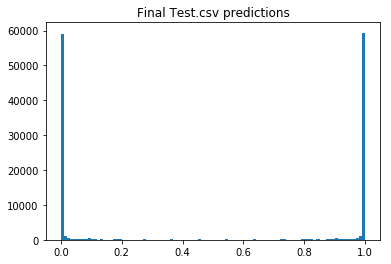

In [26]:
suby = pd.read_csv('../input/sample_submission.csv')
suby['target'] = preds
#sub.to_csv('submission.csv',index=False)

import matplotlib.pyplot as plt
plt.hist(preds,bins=100)
plt.title('Final Test.csv predictions')
plt.show()

In [27]:
subz = pd.read_csv('../input/sample_submission.csv')

In [28]:
subz['target']=sub['target']*0.875+suby['target']*.125

In [29]:
subg=pd.read_csv('../input/sample_submission.csv')

In [30]:
subg['target']=subz['target']*0.75+subx['target']*.25

In [31]:
sublp = pd.read_csv('../input/sample_submission.csv')

In [32]:
sublp['target']=subg['target']*0.75+subtc['target']*.25

In [33]:
sublp.to_csv('submission.csv',index=False)